In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
data_set = pd.read_csv('monthly_milk_production.csv', index_col='Date', parse_dates=True)
data_set.index.freq = 'MS'
data_set

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


<AxesSubplot: xlabel='Date'>

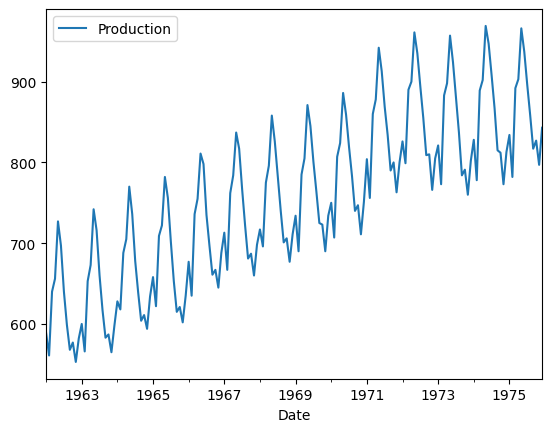

In [3]:
data_set.plot()

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
decomposed = seasonal_decompose(data_set['Production'])

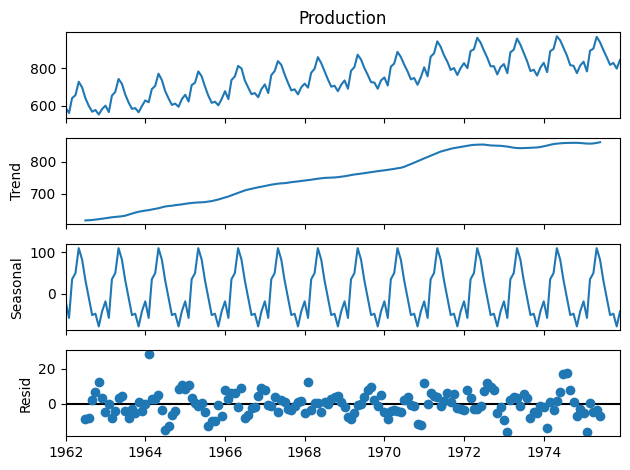

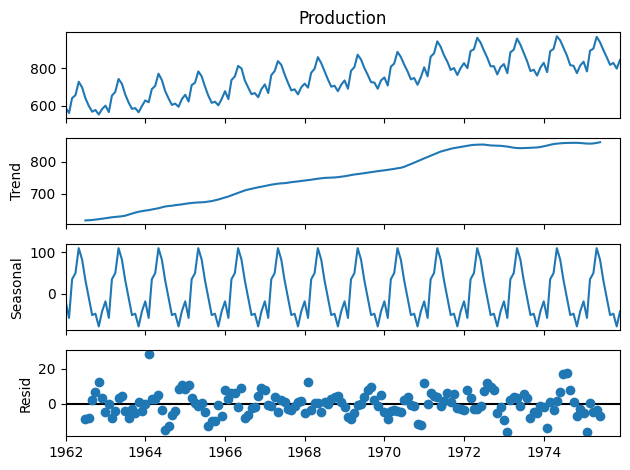

In [6]:
decomposed.plot()

In [7]:
len(data_set)

168

In [8]:
# Leaving last 12 months as testing set and train on remaining set

train_set = data_set.iloc[:156]
test_set = data_set.iloc[156:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
scaler.fit(train_set)

MinMaxScaler()

In [11]:
scaled_train = scaler.transform(train_set)
scaled_test = scaler.transform(test_set)

In [12]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [13]:
import tensorflow
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


NameError: name 'scaled_train' is not defined